## Importación de librerías

In [1]:
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar
import datetime as dt
from datetime import timedelta
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Creación de instancia

In [2]:
objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI

## Fecha final de mes

In [3]:
today_m = dt.datetime.now() #este preciso instante
day_m = today_m.day #calculo el dia de hoy (int)
last_day_previous_month = today_m - timedelta(day_m) #obtengo la fecha del ultimo día del mes anterior
last_day_previous_month

datetime.datetime(2022, 2, 28, 10, 5, 13, 165163)

In [4]:
year_m1, month_m1, day_m1 = last_day_previous_month.year, last_day_previous_month.month, last_day_previous_month.day

## Demanda Comercial

### Curva de carga promedio GWh

#### Obtención y procesamiento

In [5]:
df = apiXM.request_data(objetoAPI,    #Se indica el objeto que contiene el serivicio
                        "DemaCome",           #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        0,                    #Campo númerico indicando el nivel de desagregación, 1 para valores por Recurso
                        dt.date(year_m1, month_m1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(year_m1, month_m1, day_m1)) #Corresponde a la fecha final de la consulta

df['Date'] = pd.to_datetime(df['Date']) #establecemos la columna Date como datetime
df.index = df['Date'] #establecemos el índice como la columna Date
df = df.drop(columns=['Id', 'Values_code', 'Date']) #eliminamos columnas innecesarias
df = round(df/10**6,4) #dividimos todos los datos por 10**6 para convertir kWh a GWh
df = round(df.describe(),2) #obtenemos la descripción estadística del dataframe
df = df.T #obtenemos la transpuesta para una mejor visualización
list_hours = list(df.index) #obtenemos la lista de horas (1-24)
df['hour'] = [value_hour[-2:] for value_hour in list_hours] #creamos la columna hora en el df solo poniendo numeros
df.index = df['hour'] #establecemos el índice como la columna hour
df = df.drop(columns=['hour']) #eliminamos la columna hour
df

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
01,28.0,7.74,0.20,7.29,7.62,7.77,7.87,8.10
02,28.0,7.47,0.17,7.08,7.37,7.49,7.60,7.70
03,28.0,7.30,0.19,6.92,7.19,7.33,7.43,7.74
04,28.0,7.23,0.21,6.86,7.09,7.27,7.35,7.75
05,28.0,7.35,0.23,6.80,7.26,7.39,7.49,7.69
06,28.0,7.75,0.42,6.77,7.56,7.93,8.05,8.18
07,28.0,7.83,0.52,6.57,7.70,8.05,8.17,8.26
08,28.0,8.20,0.56,6.78,8.20,8.43,8.51,8.65
09,28.0,8.67,0.58,7.20,8.74,8.87,8.96,9.13


#### Visualización

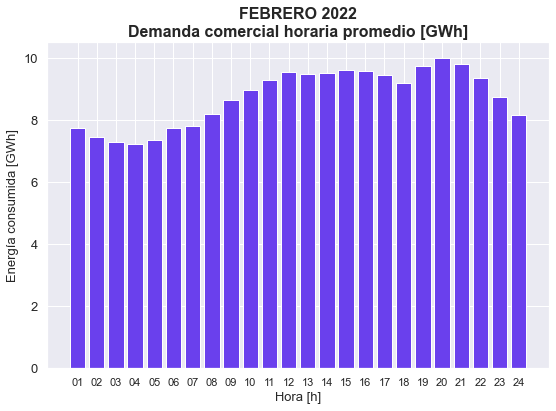

In [6]:
sns.set()

if month_m1 == 1:
    month_str = 'ENERO'
elif month_m1 == 2:
    month_str = 'FEBRERO'
elif month_m1 == 3:
    month_str = 'MARZO'
elif month_m1 == 4:
    month_str = 'ABRIL'
elif month_m1 == 5:
    month_str = 'MAYO'
elif month_m1 == 6:
    month_str = 'JUNIO'
elif month_m1 == 7:
    month_str = 'JULIO'
elif month_m1 == 8:
    month_str = 'AGOSTO'
elif month_m1 == 9:
    month_str = 'SEPTIEMBRE'
elif month_m1 == 10:
    month_str = 'OCTUBRE'
elif month_m1 == 11:
    month_str = 'NOVIEMBRE'
elif month_m1 == 12:
    month_str = 'DICIEMBRE'


plt.figure(figsize=(9, 6)) #tamaño de la figura

plt.bar(
    x=df.index,
    height=df['mean'],
    color='#6a40ed'
)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.title(f'{month_str} {str(year_m1)}\nDemanda comercial horaria promedio [GWh]', fontsize=16, fontweight='bold')
plt.ylabel('Energía consumida [GWh]', fontsize=13)
plt.xlabel('Hora [h]', fontsize=13)
plt.savefig(f'{month_str}_{str(year_m1)}_demanda_comercial_horaria_promedio_GWh.png', format='png', dpi=100,bbox_inches="tight")
plt.show()

#### Descripción

In [7]:
df.describe()

,count,mean,std,min,25%,50%,75%,max
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,28.0,8.755833,0.447500,7.704167,8.636250,8.899583,9.029583,9.315833
std,0.0,0.931417,0.174213,0.718736,0.921321,0.980982,1.003344,1.070465
min,28.0,7.230000,0.170000,6.570000,7.090000,7.270000,7.350000,7.690000
25%,28.0,7.810000,0.267500,7.040000,7.680000,8.020000,8.140000,8.240000
50%,28.0,9.095000,0.495000,7.840000,9.020000,9.280000,9.410000,9.690000
75%,28.0,9.535000,0.572500,8.155000,9.387500,9.712500,9.892500,10.222500
max,28.0,10.020000,0.710000,9.020000,9.860000,10.160000,10.270000,10.780000


In [8]:
description = f'''Demanda comercial: Considera la demanda propia de cada comercializador más la paticipacion en la pérdidas del STN y los consumos propios de los generadores.'''
hora_mayor_promedio = f'Demanda máxima: hora 20, valor = 10.02 GWh.'
hora_menor_promedio = f'Demanda mínima: hora 04, valor = 7.23 GWh.'
hora_media_promedio = f'Demanda media: horas 10 y 18, valores = 8.98 y 9.21 GWh.'
description = description + ' ' + hora_mayor_promedio + ' ' + hora_media_promedio + ' ' + hora_menor_promedio
description

'Demanda comercial: Considera la demanda propia de cada comercializador más la paticipacion en la pérdidas del STN y los consumos propios de los generadores. Demanda máxima: hora 20, valor = 10.02 GWh. Demanda media: horas 10 y 18, valores = 8.98 y 9.21 GWh. Demanda mínima: hora 04, valor = 7.23 GWh.'

#### Publicación en Linkedin

##### Febrero 2022 (https://www.linkedin.com/posts/juancjaramillot_energaeda-colombia-anaerlisis-activity-6907317911665680384-rqkT)

🔌 FEBRERO 2022 - Curva de carga demanda comercial energía eléctrica Colombia 📊

💡La Demanda comercial de energía eléctrica en Colombia "considera la demanda propia de cada comercializador más la participación en la pérdidas del STN y los consumos propios de los generadores" - XM.

Demanda máxima 🔋🔋🔋: hora 20 (10.02 GWh).
Demanda media 🔋🔋: horas 10 y 18 (8.98 y 9.21 GWh).
Demanda mínima 🔋: hora 04 (7.23 GWh).

📊 La gráfica muestra la curva de carga promedio para los consumos de energía eléctrica del mes de febrero 2022.

👀 ¿Te gustaría conocer más del sector eléctrico en Colombia? Sígueme para más análisis de datos interesantes.

Fuente: XM

#energía #colombia #análisis #visualization #visualizacióndedatos #xm #dataanalysis #mean #retounergy #electricalengineering #electricity

### Serie de tiempo

#### Obtención y procesamiento

In [9]:
df = apiXM.request_data(objetoAPI,    #Se indica el objeto que contiene el serivicio
                        "DemaCome",           #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        0,                    #Campo númerico indicando el nivel de desagregación, 1 para valores por Recurso
                        dt.date(2022, 2, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2022, 2, 28)) #Corresponde a la fecha final de la consulta

df['Date'] = pd.to_datetime(df['Date']) #establecemos la columna Date como datetime
df.index = df['Date'] #establecemos el índice como la columna Date
df = df.drop(columns=['Id', 'Values_code', 'Date']) #eliminamos columnas innecesarias
df = round(df/10**6,2) #dividimos todos los datos por 10**6 para convertir kWh a GWh
df['GWh/día'] = df.sum(axis=1)
df = df.drop(df.loc[:, 'Values_Hour01':'Values_Hour24'].columns, axis = 1) #eliminar todas columnas entre 01 y 24 horas
df

,GWh/día
Date,
2022-02-01,213.70
2022-02-02,216.31
2022-02-03,218.04
2022-02-04,218.13
2022-02-05,206.84
2022-02-06,186.44
2022-02-07,210.75
2022-02-08,212.23
2022-02-09,212.77


#### Visualización

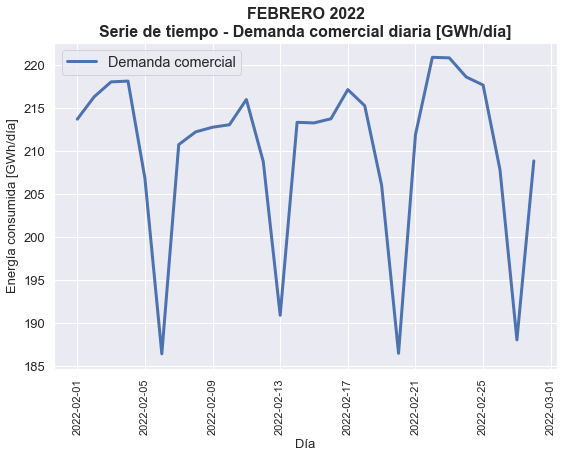

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

labels = ['Demanda comercial']
plt.figure(figsize=(9,6))
plt.plot(
    df.index,
    df['GWh/día'],
    linewidth=3.0
)

plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=13)
plt.title('FEBRERO 2022\nSerie de tiempo - Demanda comercial diaria [GWh/día]', fontsize=16, fontweight='bold')
plt.ylabel('Energía consumida [GWh/día]', fontsize=13)
plt.xlabel('Día', fontsize=13)
plt.legend(labels=labels, fontsize="large")
plt.savefig('demanda_comercial_serie_tiempo_gwh.png', format='png', dpi=100,bbox_inches="tight")
plt.show()

#### Descripción

In [11]:
df_describe = df.describe()
df_describe

,GWh/día
count,28.000000
mean,210.138214
std,10.028628
min,186.440000
25%,208.532500
50%,213.165000
75%,216.517500
max,220.890000


In [12]:
max_demand = df_describe['GWh/día'].iloc[-1]
max_day = df.index[df['GWh/día'] == max_demand].tolist()[0].strftime("%Y-%m-%d")
max_day

'2022-02-22'

In [13]:
min_demand = df_describe['GWh/día'].iloc[3]
min_day = df.index[df['GWh/día'] == min_demand].tolist()[0].strftime("%Y-%m-%d")
min_day

'2022-02-06'

In [14]:
mean_month = round(df_describe['GWh/día'].iloc[1],2)
mean_month

210.14

#### Publicación en Linkedin

##### Febrero 2022 (https://www.linkedin.com/posts/juancjaramillot_energaeda-colombia-anaerlisis-activity-6907384999994359808-O9kW)

🔌 FEBRERO 2022 - Serie de tiempo demanda comercial energía eléctrica Colombia 📈📉 Promedio = 210.14 GWh/día


💡La Demanda comercial de energía eléctrica en Colombia "considera la demanda propia de cada comercializador más la participación en la pérdidas del STN y los consumos propios de los generadores" - XM.


Demanda máxima 🔋🔋🔋: día 22 (220.89 GWh). 

Demanda media 🔋🔋: días 10 y 15 (213.06 y 213.27 GWh). 

Demanda mínima 🔋: día 06 (186.44 GWh).


📈 📉 La gráfica muestra la serie de tiempo para los consumos de energía eléctrica del mes de febrero 2022. ¡Trabajamos mucho la última semana!


👀 ¿Te gustaría conocer más del sector eléctrico en Colombia? Sígueme para más análisis de datos interesantes.


Fuente: XM


#energía #colombia #análisis #visualization #visualizacióndedatos #xm #dataanalysis #mean #retounergy #electricalengineering #electricity